# **E–Commerce Sales Analysis Full Project**

## **Project Objectives**

### **1️⃣ Calculate the monthly sales of the store and identify:**
- **Which month had the highest sales?**
- **Which month had the lowest sales?**

---

### **2️⃣ Analyze sales based on product categories and determine:**
- **Which category has the highest sales?**
- **Which category has the lowest sales?**

---

### **3️⃣ Perform sales analysis based on sub-categories.**

---

### **4️⃣ Analyze the monthly profit from sales and determine:**
- **Which month had the highest profit?**

---

### **5️⃣ Analyze the profit by category and sub-category.**

---

### **6️⃣ Analyze the sales and profit by customer segment.**

---

### **7️⃣ Analyze the sales-to-profit ratio.**



### **1️⃣ Calculate the monthly sales of the store and identify:**

Highest Sales Month: 2017-11, Sales: 118447.82
Lowest Sales Month: 2014-02, Sales: 4519.89


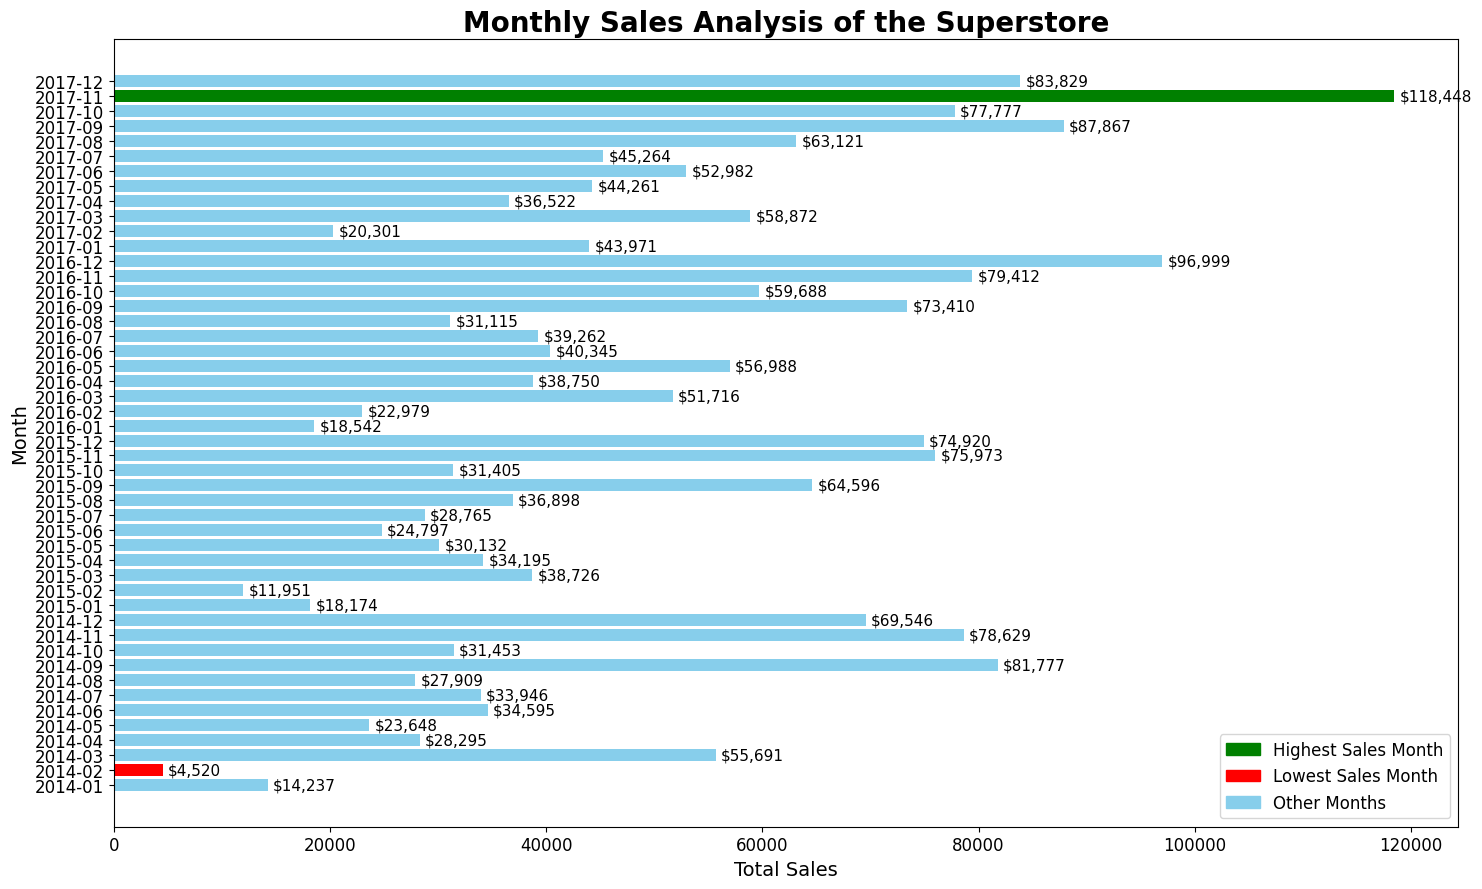

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the data
df = pd.read_csv(r"C:\Users\SANTOSH\Downloads\Sample - Superstore (1).csv", encoding='latin1')

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Month' column in Year-Month format
df['Month'] = df['Order Date'].dt.to_period('M')

# Calculate total monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Find the month with the highest and lowest sales
highest_month = monthly_sales.idxmax()
highest_sales = monthly_sales.max()

lowest_month = monthly_sales.idxmin()
lowest_sales = monthly_sales.min()

# Print the results
print(f"Highest Sales Month: {highest_month}, Sales: {highest_sales:.2f}")
print(f"Lowest Sales Month: {lowest_month}, Sales: {lowest_sales:.2f}")

# Prepare data for plotting
months = monthly_sales.index.astype(str)
sales = monthly_sales.values

# Set colors: green for highest, red for lowest, skyblue for others
colors = []
for m in monthly_sales.index:
    if m == highest_month:
        colors.append('green')
    elif m == lowest_month:
        colors.append('red')
    else:
        colors.append('skyblue')

# Create the plot
plt.figure(figsize=(15, 9))  # Larger size for clarity

plt.barh(months, sales, color=colors)

# Add title and labels
plt.title('Monthly Sales Analysis of the Superstore', fontsize=20, fontweight='bold')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Month', fontsize=14)

# Add sales values on the bars
for index, value in enumerate(sales):
    plt.text(value + 500, index, f"${value:,.0f}", va='center', fontsize=11)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
green_patch = mpatches.Patch(color='green', label='Highest Sales Month')
red_patch = mpatches.Patch(color='red', label='Lowest Sales Month')
blue_patch = mpatches.Patch(color='skyblue', label='Other Months')
plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize=12)

plt.tight_layout()
plt.show()


### **2️⃣ Analyze sales based on product categories and determine:**

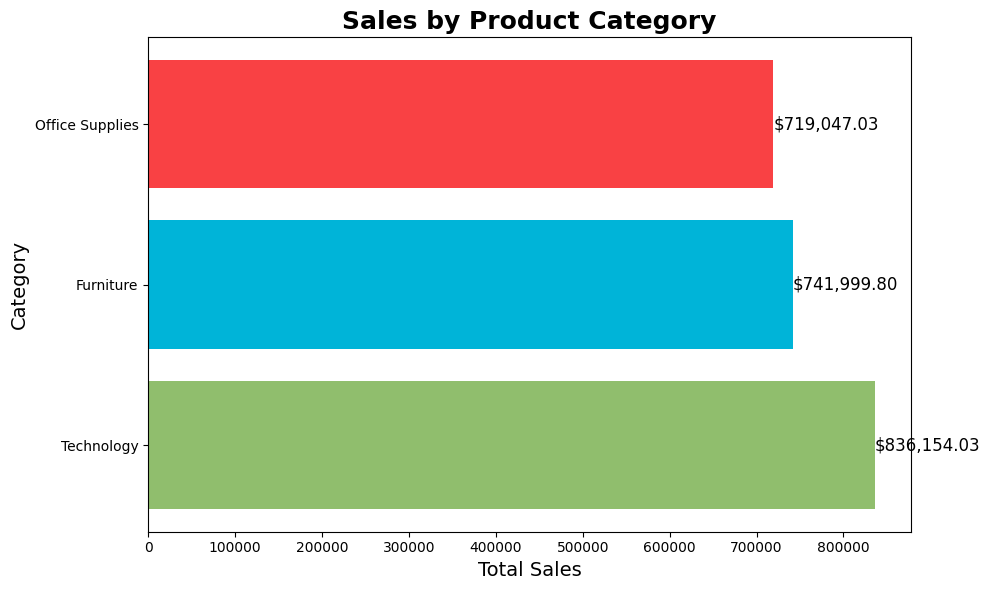

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\SANTOSH\Downloads\Sample - Superstore (1).csv", encoding='latin1')

# Group by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Create colors
colors = []

for x in category_sales:
    if x == category_sales.max():
        colors.append('#90be6d')  # Green for highest
    elif x == category_sales.min():
        colors.append('#f94144')  # Red for lowest
    else:
        colors.append('#00b4d8')  # Blue for normal


# Plot using Matplotlib to avoid Seaborn warning
plt.figure(figsize=(10,6))
bars = plt.barh(category_sales.index, category_sales.values, color=colors)

# Add values on bars
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, f"${bar.get_width():,.2f}", va='center', fontsize=12)

# Title and labels
plt.title('Sales by Product Category', fontsize=18, fontweight='bold')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Category', fontsize=14)

plt.tight_layout()
plt.show()


### **3️⃣ Perform sales analysis based on sub-categories.**

Sales Analysis by Sub-Category:
Sub-Category
Fasteners        3024.2800
Labels          12486.3120
Envelopes       16476.4020
Art             27118.7920
Supplies        46673.5380
Paper           78479.2060
Furnishings     91705.1640
Appliances     107532.1610
Bookcases      114879.9963
Copiers        149528.0300
Accessories    167380.3180
Machines       189238.6310
Binders        203412.7330
Tables         206965.5320
Storage        223843.6080
Chairs         328449.1030
Phones         330007.0540
Name: Sales, dtype: float64


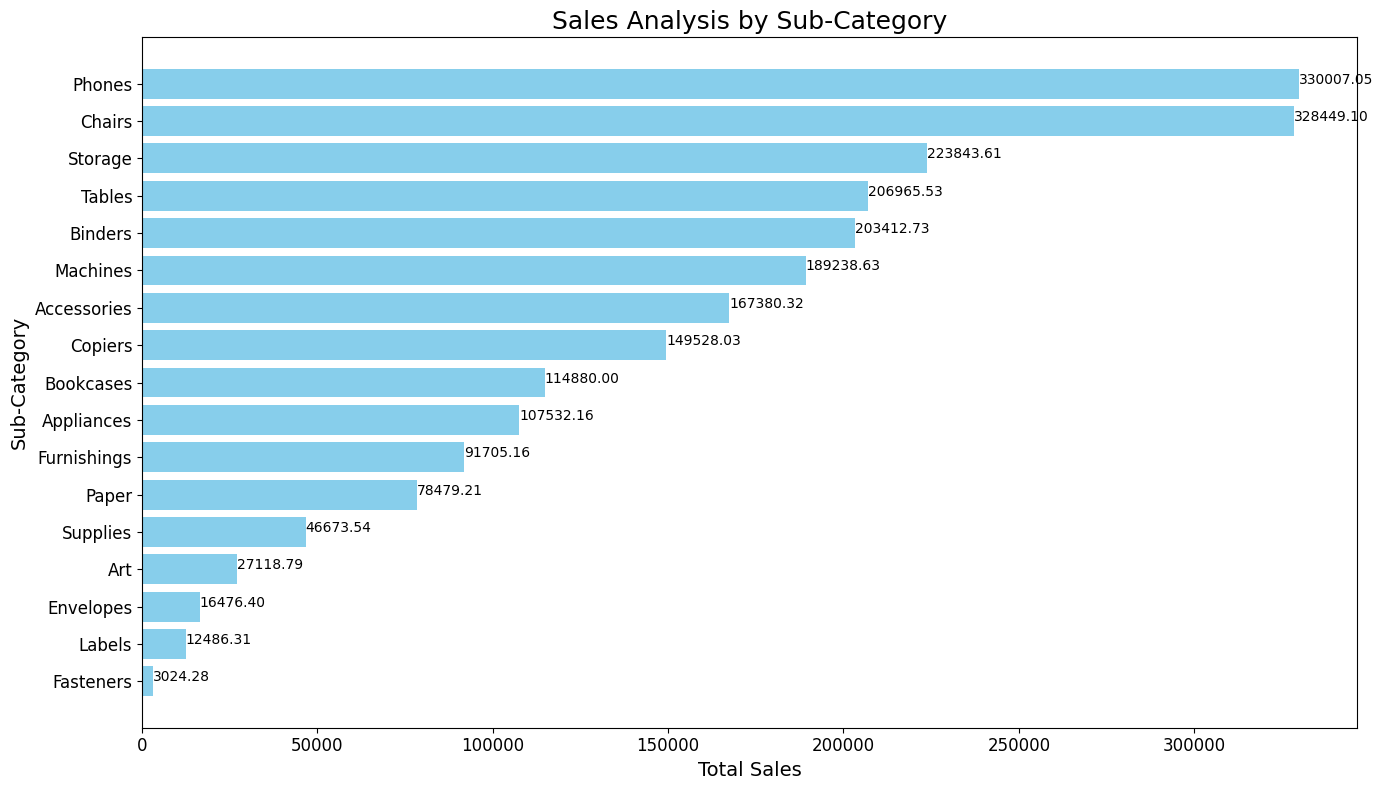

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\SANTOSH\Downloads\Sample - Superstore (1).csv", encoding='latin1')

# Group by Sub-Category and calculate total sales
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values()

# Print the sales per sub-category
print("Sales Analysis by Sub-Category:")
print(subcat_sales)

# Plotting
plt.figure(figsize=(14,8))  # Bigger size for clear visualization

# Horizontal bar chart for sub-category sales
plt.barh(subcat_sales.index, subcat_sales.values, color='skyblue')

# Add labels and title
plt.title('Sales Analysis by Sub-Category', fontsize=18)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Sub-Category', fontsize=14)

# Display values on bars
for index, value in enumerate(subcat_sales.values):
    plt.text(value, index, f'{value:.2f}', fontsize=10, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### **4️⃣ Analyze the monthly profit from sales and determine:**
- **Which month had the highest profit?**

Highest Profit Month: 2016-12, Profit: ₹17885.31


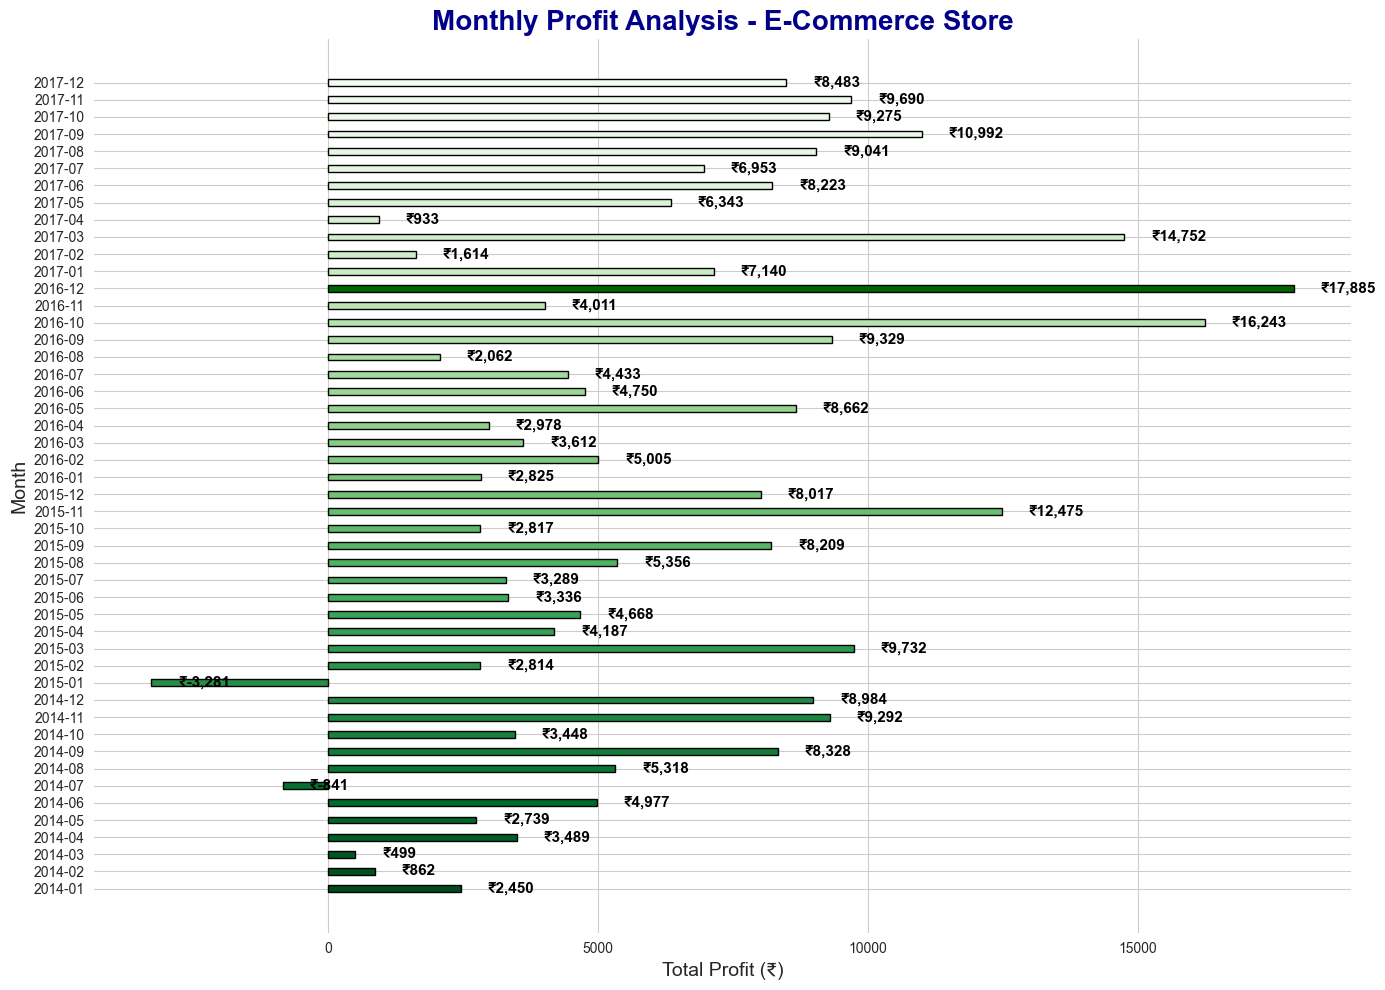

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\SANTOSH\Downloads\Sample - Superstore (1).csv", encoding='latin1')

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Month' column in Year-Month format
df['Month'] = df['Order Date'].dt.to_period('M')

# Group by Month and calculate total profit
monthly_profit = df.groupby('Month')['Profit'].sum()
highest_profit_month = monthly_profit.idxmax()
highest_profit_value = monthly_profit.max()

print(f"Highest Profit Month: {highest_profit_month}, Profit: ₹{highest_profit_value:.2f}")

# Sort the data for better visualization
monthly_profit = monthly_profit.sort_index()

# Set the figure and style
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")

# Prepare data
y_positions = np.arange(len(monthly_profit))
bar_height = 0.4  # Smaller bar height for clear gaps

# Use a Seaborn color palette
colors = sns.color_palette("Greens_r", len(monthly_profit))

# Highlight highest profit month with darker color
highlight_color = 'darkgreen'
colors = [highlight_color if month == highest_profit_month else colors[i] 
          for i, month in enumerate(monthly_profit.index)]

# Create horizontal bar plot
bars = plt.barh(monthly_profit.index.astype(str), monthly_profit.values, height=bar_height, color=colors, edgecolor='black')

# Add profit values next to bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f'₹{bar.get_width():,.0f}',
             ha='left', va='center', fontsize=11, fontweight='bold', color='black')


# Titles and labels
plt.title('Monthly Profit Analysis - E-Commerce Store', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Total Profit (₹)', fontsize=14)
plt.ylabel('Month', fontsize=14)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout
plt.tight_layout()
plt.show()


### **5️⃣ Analyze the profit by category and sub-category.**

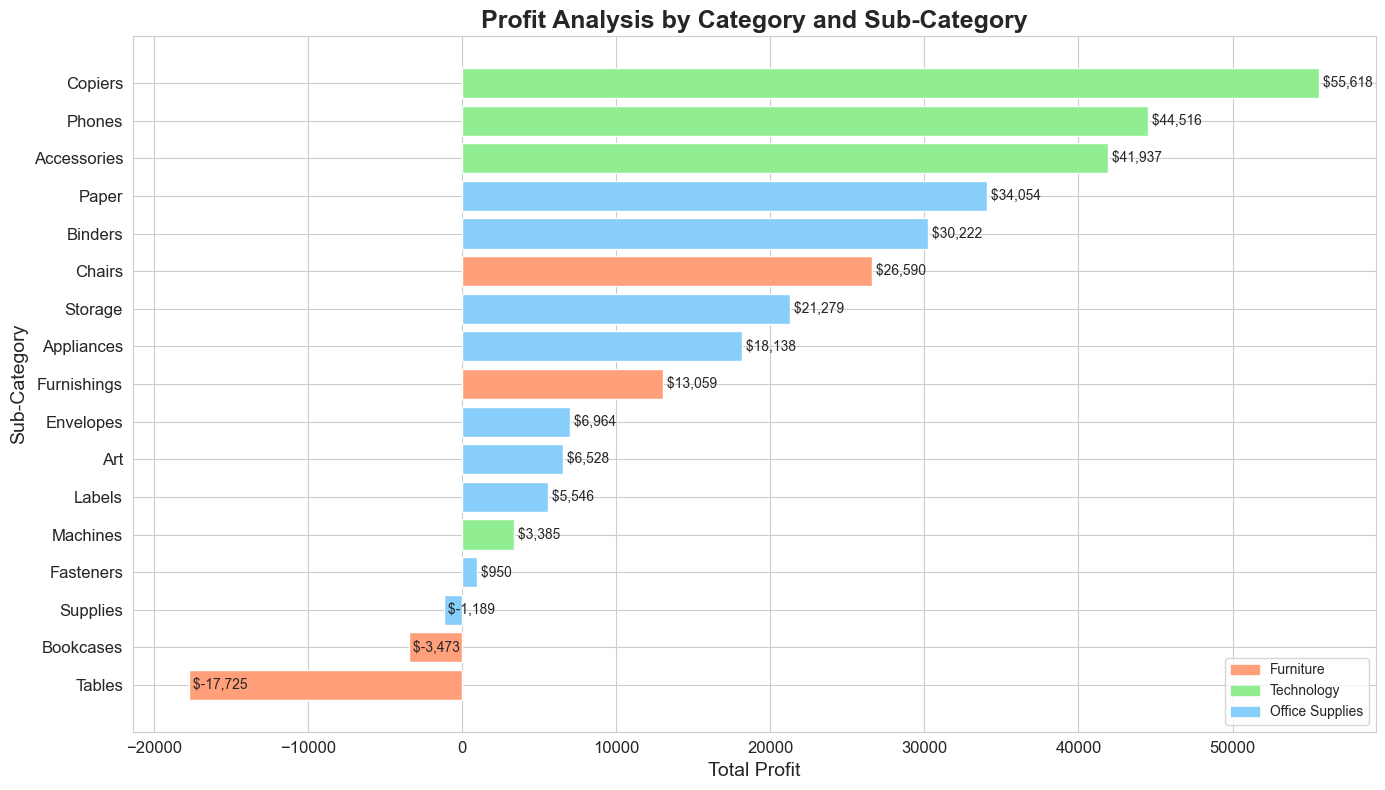

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the dataset
df = pd.read_csv(r"C:\Users\SANTOSH\Downloads\Sample - Superstore (1).csv", encoding='latin1')

# Group by Category and Sub-Category, calculate total profit
profit_data = df.groupby(['Category', 'Sub-Category'])['Profit'].sum()

# Reset index for plotting
profit_data = profit_data.reset_index()

# Sort by profit (for better visualization)
profit_data = profit_data.sort_values(by='Profit')

# Create color list based on Category
colors = []

for cat in profit_data['Category']:
    if cat == 'Furniture':
        colors.append('#FFA07A')  # Light Salmon
    elif cat == 'Technology':
        colors.append('#90EE90')  # Light Green
    else:
        colors.append('#87CEFA')  # Light Sky Blue

# Plot horizontal bar chart
plt.figure(figsize=(14,8))

plt.barh(profit_data['Sub-Category'], profit_data['Profit'], color=colors)

# Add title and labels
plt.title('Profit Analysis by Category and Sub-Category', fontsize=18, fontweight='bold')
plt.xlabel('Total Profit', fontsize=14)
plt.ylabel('Sub-Category', fontsize=14)

# Add profit values on bars
for index, value in enumerate(profit_data['Profit']):
    plt.text(value, index, f' ${value:,.0f}', fontsize=10, va='center')

# Create custom legend
furniture_patch = mpatches.Patch(color='#FFA07A', label='Furniture')
technology_patch = mpatches.Patch(color='#90EE90', label='Technology')
office_patch = mpatches.Patch(color='#87CEFA', label='Office Supplies')

plt.legend(handles=[furniture_patch, technology_patch, office_patch], loc='lower right')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### **6️⃣ Analyze the sales and profit by customer segment.**

Sales and Profit by Customer Segment:
       Segment         Sales       Profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785


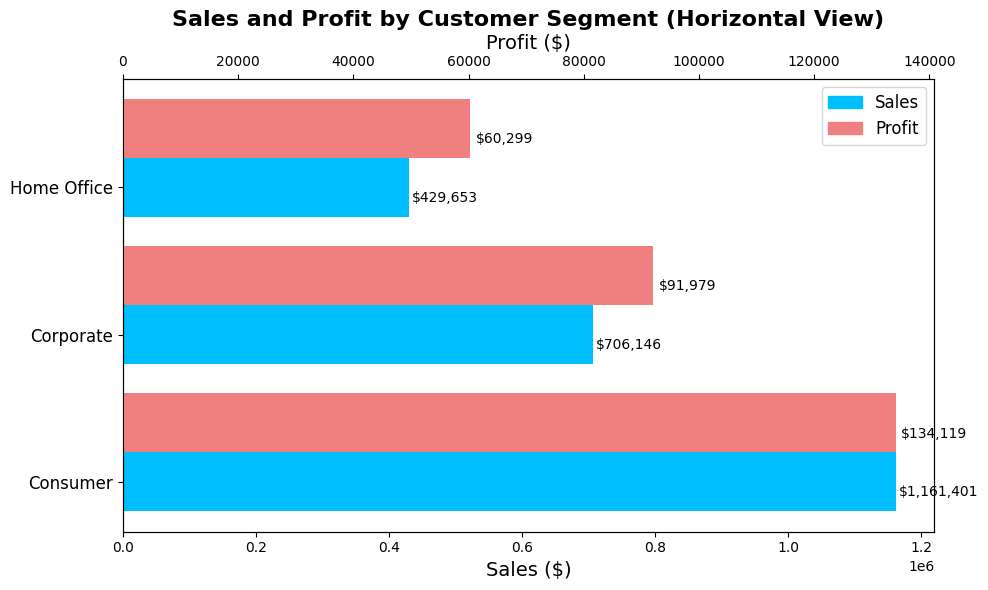

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Load the dataset
df = pd.read_csv(r"C:\Users\SANTOSH\Downloads\Sample - Superstore (1).csv", encoding='latin1')

# Group by 'Segment' and calculate total Sales and Profit
segment_data = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Print the results
print("Sales and Profit by Customer Segment:")
print(segment_data)

# Visualization - Horizontal Bar Chart with Dual Axes

fig, ax1 = plt.subplots(figsize=(10,6))


# Bar positions
y_pos = np.arange(len(segment_data))

# Sales - Horizontal bar
ax1.barh(y_pos, segment_data['Sales'], color='deepskyblue', height=0.4)
ax1.set_xlabel('Sales ($)', fontsize=14)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(segment_data['Segment'], fontsize=12)

# Create second axis for profit
ax2 = ax1.twiny()
ax2.barh(y_pos + 0.4, segment_data['Profit'], color='lightcoral', height=0.4)
ax2.set_xlabel('Profit ($)', fontsize=14)

# Title
plt.title('Sales and Profit by Customer Segment (Horizontal View)', fontsize=16, fontweight='bold')

# Add values on bars
for i in range(len(segment_data)):
    ax1.text(segment_data['Sales'][i] + 5000, y_pos[i]-0.1, f"${segment_data['Sales'][i]:,.0f}", fontsize=10, color='black')
    ax2.text(segment_data['Profit'][i] + 1000, y_pos[i]+0.3, f"${segment_data['Profit'][i]:,.0f}", fontsize=10, color='black')

# Custom Legend
sales_patch = mpatches.Patch(color='deepskyblue', label='Sales')
profit_patch = mpatches.Patch(color='lightcoral', label='Profit')

# Place legend at the top right
plt.legend(handles=[sales_patch, profit_patch], loc='upper right', fontsize=12)


# Layout
plt.tight_layout()
plt.show()


# **Analyze the Sales to Profit Ratio**


       Segment         Sales       Profit  Sales_to_Profit_Ratio
0     Consumer  1.161401e+06  134119.2092               8.659471
1    Corporate  7.061464e+05   91979.1340               7.677245
2  Home Office  4.296531e+05   60298.6785               7.125416


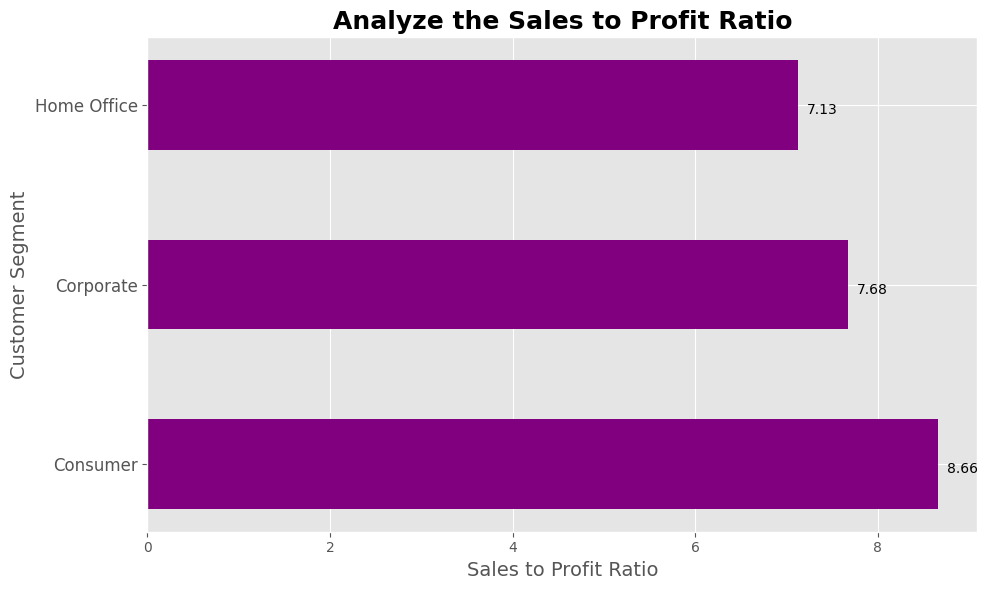

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv(r"C:\Users\SANTOSH\Downloads\Sample - Superstore (1).csv", encoding='latin1')

# Group by Segment and calculate Sales and Profit
segment_data = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Calculate Sales to Profit Ratio
segment_data['Sales_to_Profit_Ratio'] = segment_data['Sales'] / segment_data['Profit']

# Print the data
print(segment_data)

# Visualization Part
plt.figure(figsize=(10,6))
plt.style.use('ggplot')  # Nice clean style

# Bar plot - Sales to Profit Ratio
y_pos = np.arange(len(segment_data))

plt.barh(y_pos, segment_data['Sales_to_Profit_Ratio'], color='purple', height=0.5)

# Set y-axis labels (segments)
plt.yticks(y_pos, segment_data['Segment'], fontsize=12)

# Title and axis labels
plt.title('Analyze the Sales to Profit Ratio', fontsize=18, fontweight='bold')
plt.xlabel('Sales to Profit Ratio', fontsize=14)
plt.ylabel('Customer Segment', fontsize=14)

# Add value labels to the bars
for i in range(len(segment_data)):
    ratio = segment_data['Sales_to_Profit_Ratio'][i]
    plt.text(ratio + 0.1, y_pos[i]-0.05, f"{ratio:.2f}", fontsize=10, color='black')

plt.tight_layout()
plt.show()
